## 分割
基于python脚本语言开发的数字图片处理包，比如PIL,Pillow, opencv, scikit-image等。
PIL和Pillow只提供最基础的数字图像处理，功能有限；opencv实际上是一个c++库，只是提供了python接口，更新速度非常慢。scikit-image是基于scipy的一款图像处理包，它将图片作为numpy数组进行处理。



## PIL

In [14]:
from PIL import Image as img

img = img.open(file)
file = r'F:\DataSet\building.jpg'

print(type(img))
print(img.size)            #图片的尺寸
print(img.mode)            #图片的模式
print(img.format)          #图片的格式
print(img.getpixel((0,0))) #img读出来的图片获得某点像素用getpixel((w,h))可以直接返回这个点三个通道的像素值

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(4032, 3024)
RGB
JPEG
(98, 119, 164)


## skimage

skimage包的全称是scikit-image SciKit (toolkit for SciPy)，它对scipy.ndimage进行了扩展，提供了更多的图片处理功能，由 scipy 社区开发和维护。

读取的图片以numpy数组形式存放。

skimage程序自带了一些示例图片

|    名称    |   图片     |    名称   |    图片     |     名称   |    图片      |
| ------------:|--------------:| -----------:| --------------:| -------------:| ---------------:|
| astronaut   | 宇航员图片   |  coffee    |  一杯咖啡图片  |   lena     | lena美女图片   |
| camera     |拿相机的人图片 |   coins   |   硬币图片	  |   moon     |  月亮图片     |
| checkerboard |棋盘图片     | horse     |  马图片      |	  page     |  书页图片     |
| chelsea

小猫图片	
hubble_deep_field

星空图片	
text

文字图片
clock

 时钟图片	
immunohistochemistry

结肠图片	

---------------------
示例图片存放在skimage的安装目录下面，路径名称为data_dir

io：读取、保存和显示图片或视频
data：提供一些测试图片和样本数据
color：颜色空间变换
filters：图像增强、边缘检测、排序滤波器、自动阈值等
draw：操作于numpy数组上的基本图形绘制，包括线条、矩形、圆和文本等
transform：几何变换或其它变换，如旋转、拉伸和拉东变换等
morphology：形态学操作，如开闭运算、骨架提取等
exposure：图片强度调整，如亮度调整、直方图均衡等
feature：特征检测与提取等
measure：图像属性的测量，如相似性或等高线等
segmentation：图像分割
restoration：图像恢复
util：通用函数

<class 'numpy.ndarray'>
(300, 451, 3)
300
451
3
405900
231
0
115.305141661
[143 120 104]
129
C:\Anaconda3\lib\site-packages\skimage\data


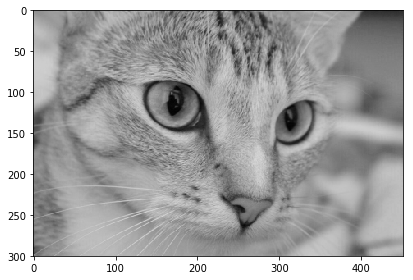

In [21]:
from skimage import io, data

img = data.chelsea()
io.imshow(img)
print(type(img))     #显示类型
print(img.shape)     #显示尺寸
print(img.shape[0])  #图片高度
print(img.shape[1])  #图片宽度

print(img.shape[2])  #图片通道数
print(img.size)      #显示总像素个数
print(img.max())     #最大像素值
print(img.min())     #最小像素值
print(img.mean())    #像素平均值
print(img[0][0])     #图像的像素值

pixel=img[20,30,1]
print(pixel)

from skimage import data_dir
print(data_dir)

R=img[:,:,0]   # 显示红色单通道图片
io.imshow(R)

# img = io.imsave('f:/cat.jpg', img)
# img = io.imread('f:/cat.jpg', as_grey=True)
# io.imshow(img)

添加椒盐噪声

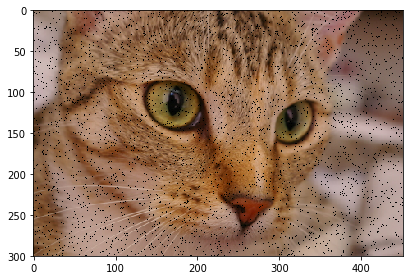

In [23]:
import numpy as np
img=data.chelsea()

#随机生成5000个椒盐
rows,cols,dims = img.shape
for i in range(5000):
    x = np.random.randint(0, rows)  # 随机选取的x坐标
    y = np.random.randint(0, cols)  # 随机选取的y坐标
    img[x,y,:] = 255  # 白色，0：黑色
io.imshow(img)

Image读出来的是PIL的类型，而skimage.io读出来的数据是numpy格式。  
> Img读图片的大小是图片的(width, height)；而skimage的是(height,width, channel)
Img读出来的图片获得某点像素用getpixel((w,h))可以直接返回这个点三个通道的像素值
skimage读出来的图片可以直接img_file2[0][0]获得，但是一定记住它的格式，并不是你想的(channel,height,width)

In [5]:
file = r'F:\DataSet\building.jpg'
img_file1 = img.open(file)
img_file2 = io.imread(file)

print(img_file1.size)
print(img_file2.shape)

print(img_file1.getpixel((0, 0)))
print(img_file2[0][0])

(4032, 3024)
(3024, 4032, 3)
(98, 119, 164)
[ 98 119 164]


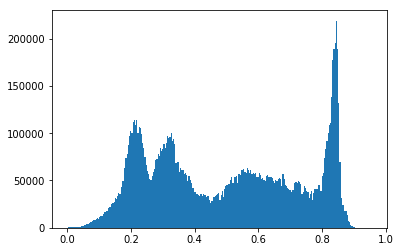

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import filters
import matplotlib.cm as cm
import scipy.signal as signal

filepath = r'F:\DataSet\building.jpg' # input("请输入文件路径：")
image = io.imread(filepath, as_grey=True)

image_array = np.array(image)

plt.hist(image_array.flatten(), 256)
plt.show()